<a href="https://colab.research.google.com/github/yanimaila/Studi-Independen/blob/main/Self%20-%20Learning/Latihan_ML_3_Classification_using_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-3 Classification using k-NN

**STUDI KASUS: Customer Churn**

Terdapat dataset konsumen dengan 2 kategori churn, yaitu:
- **pelanggan aktif (0)** dan
- **pelanggan yang sudah berhenti (1)**



---



# Mengimport Library

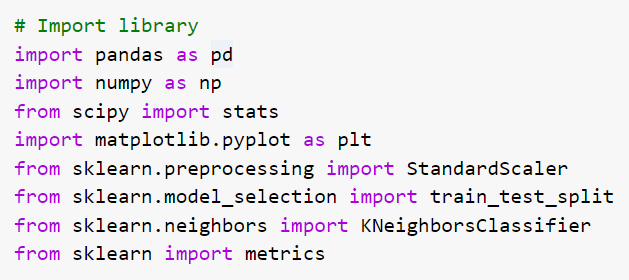

In [5]:
# Tulis di sini
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1URwnm91LhW_4awdLNglxmBG62bdnngMD/view?usp=sharing).

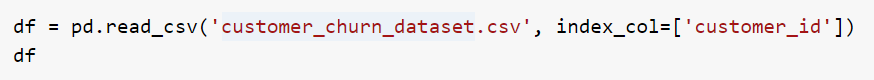

In [6]:
# Tulis di sini
df = pd.read_csv('customer_churn_dataset.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


## Data Preprocessing

Library ML umumnya hanya bisa memproses data numerik. Karena hal itu, kita perlu mengubah kolom bernilai kategorik menjadi nilai numerik.

Pada kolom product nilai atribut:
- Kartu A didefinisikan sebagai 0
- Kartu B didefinisikan sebagai 1, dan
- Kartu C didefinisikan sebagai 2

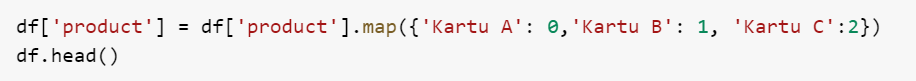

In [7]:
# Tulis di sini
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C': 2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


## Feature set

Selanjutnya, pisahkan X dan Y dari dataset. Ubah DataFrame menjadi numpy array dengan method `.values`.

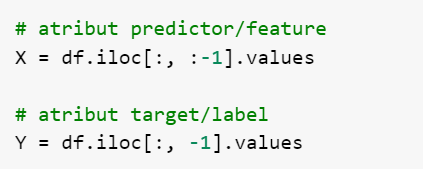

In [8]:
# Tulis di sini

# atribut predictor/featur
X = df.iloc[:, :-1].values

# atribut target/label
Y = df.iloc[:, -1].values

## Normalisasi Data

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut.

Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

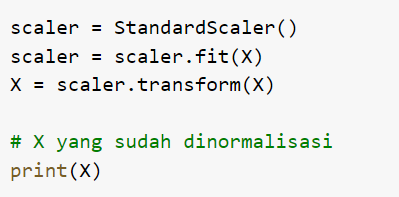

In [11]:
# Tulis di sini
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


## Splitting Data

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik

Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Kali ini kita membagi dataset dengan komposisi **sebesar 80% data training dan 20% data testing.**

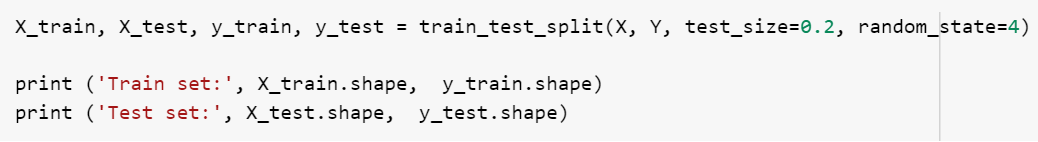

In [12]:
# Tulis di sini
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (8000, 13) (8000,)
Test set: (2000, 13) (2000,)


___

# Modeling: Klasifikasi k-Nearest Neighbor (k-NN)

**Training Model**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=7:

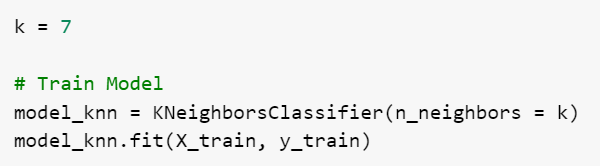

In [13]:
# Tulis di sini
k = 7

# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting**

Kita sudah dapat menggunakan model yang telah di-training untuk **memprediksikan data**

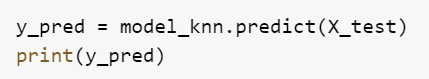

In [14]:
# Tulis di sini
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan:

membandingkan kelas **hasil prediksi model** dengan **kelas sebenarnya/actual class**.

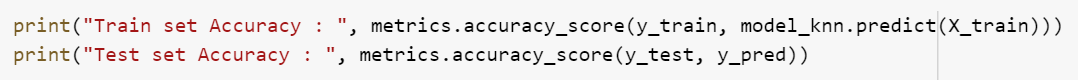

In [15]:
# Tulis di sini
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.93475
Test set Accuracy :  0.9185


Accuracy train set dan test set tidak terpaut jauh. Accuracy keduanya juga sangat tinggi.

Bisa dikatakan model dengan k=7 sudah **Good Fit**.

## **MENCARI NILAI K TERBAIK**

Performa dari model K-NN **sangat bergantung dengan nilai K**.

Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1** sampai dengan **k=10**.

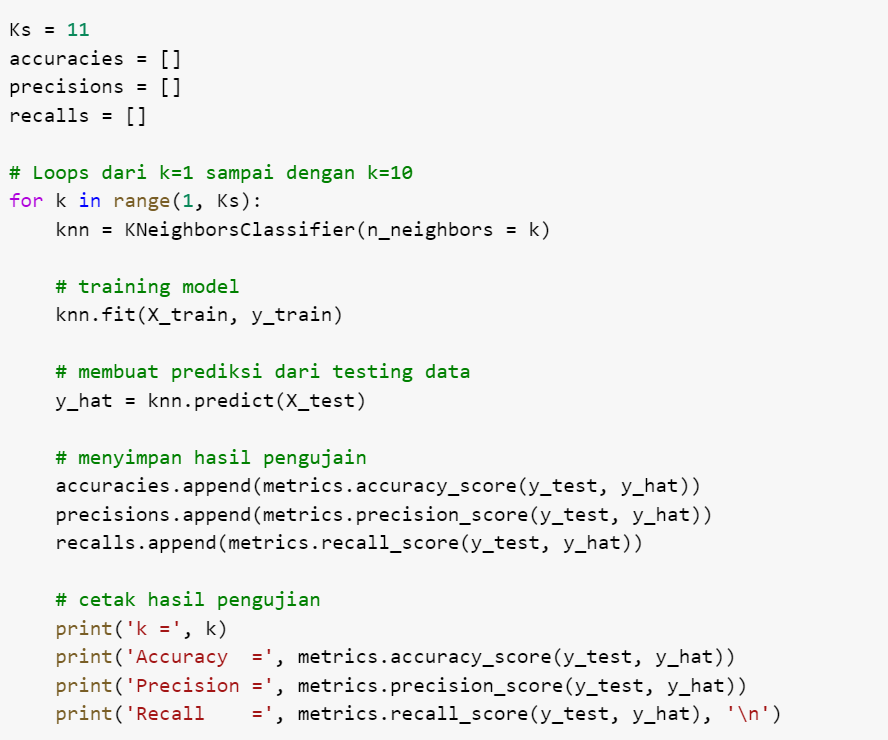

In [16]:
Ks = 11
accuracies = []
precisions = []
recalls = []

#
for k in range(1, Ks) :
    knn = KNeighborsClassifier(n_neighbors = k)

    #
    knn.fit(X_train, y_train)

    #
    y_hat = knn.predict(X_test)

    #
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    precisions.append(metrics.precision_score(y_test, y_hat))
    recalls.append(metrics.recall_score(y_test, y_hat))

    #print
    print('k =', k)
    print('Accuracy =', metrics.accuracy_score(y_test, y_hat))
    print('Precision =', metrics.precision_score(y_test, y_hat))
    print('Recall =', metrics.recall_score(y_test, y_hat))

k = 1
Accuracy = 0.914
Precision = 0.7876543209876543
Recall = 0.7876543209876543
k = 2
Accuracy = 0.9225
Precision = 0.890625
Recall = 0.7037037037037037
k = 3
Accuracy = 0.926
Precision = 0.8372703412073491
Recall = 0.7876543209876543
k = 4
Accuracy = 0.9265
Precision = 0.8862275449101796
Recall = 0.7308641975308642
k = 5
Accuracy = 0.922
Precision = 0.8467966573816156
Recall = 0.7506172839506173
k = 6
Accuracy = 0.922
Precision = 0.8738738738738738
Recall = 0.7185185185185186
k = 7
Accuracy = 0.9185
Precision = 0.8497109826589595
Recall = 0.725925925925926
k = 8
Accuracy = 0.9185
Precision = 0.8711656441717791
Recall = 0.7012345679012346
k = 9
Accuracy = 0.9145
Precision = 0.8421052631578947
Recall = 0.7111111111111111
k = 10
Accuracy = 0.9115
Precision = 0.8607594936708861
Recall = 0.671604938271605


**Kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan hasil pengujian**

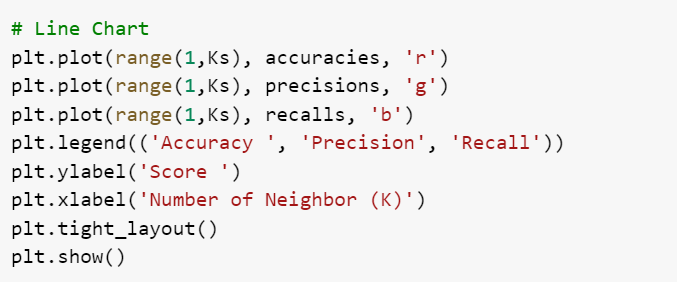

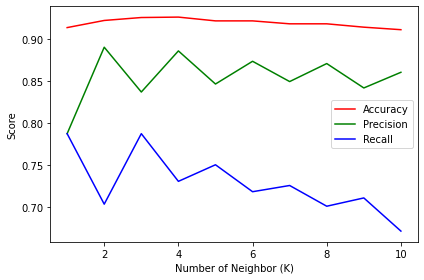

In [17]:
# Tulis di sini
plt.plot(range(1, Ks), accuracies, 'r')
plt.plot(range(1, Ks), precisions, 'g')
plt.plot(range(1, Ks), recalls, 'b')
plt.legend(('Accuracy', 'Precision', 'Recall'))
plt.ylabel('Score')
plt.xlabel('Number of Neighbor (K)')
plt.tight_layout()
plt.show()

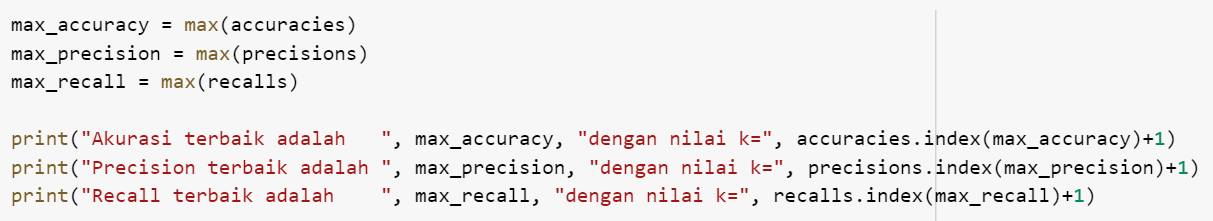

In [18]:
# Tulis di sini
max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi terbaik adalah ", max_accuracy, "dengan nilai k=", accuracies.index(max_accuracy)+1)
print("Precision terbaik adalah ", max_precision, "dengan nilai k=", precisions.index(max_precision)+1)
print("Recall terbaik adalah ", max_recall, "dengan nilai k=", recalls.index(max_recall)+1)

Akurasi terbaik adalah  0.9265 dengan nilai k= 4
Precision terbaik adalah  0.890625 dengan nilai k= 2
Recall terbaik adalah  0.7876543209876543 dengan nilai k= 1


# Kesimpulan

Supaya lebih mudah, kita akan pilih model terbaik berdasarkan metric accuracy.

Berdasarkan metric accuracy, model terbaik adalah **model dengan nilai k=4**.

# Activity ML-3

1. Cari model dengan k terbaik menggunakan metric yang sesuai untuk studi kasus customer churn!
2. Lakukan pemodelan k-NN menggunakan model dengan k terbaik (poin 1)!

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
!wget customer_churn_dataset.csv https://raw.githubusercontent.com/yanimaila/Studi-Independen/main/data%20set/customer_churn_dataset.csv

--2022-09-19 03:11:23--  http://customer_churn_dataset.csv/
Resolving customer_churn_dataset.csv (customer_churn_dataset.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘customer_churn_dataset.csv’
--2022-09-19 03:11:23--  https://raw.githubusercontent.com/yanimaila/Studi-Independen/main/data%20set/customer_churn_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846055 (826K) [text/plain]
Saving to: ‘customer_churn_dataset.csv.1’

customer_churn_data 100%[===================>] 826.23K  --.-KB/s    in 0.05s   

2022-09-19 03:11:24 (17.6 MB/s) - ‘customer_churn_dataset.csv.1’ saved [846055/846055]

FINISHED --2022-09-19 03:11:24--
Total wall clock time: 0.5s
Downloaded: 1 files, 826K in 0.05s (17.6 MB/s)


In [21]:
data = pd.read_csv('customer_churn_dataset.csv')
data

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
9996,a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
9997,b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1
9998,88709f1defd232243f729912be696f87,Kartu B,25000.00,33333.33,0.0,0.0,23497.33,0.0,0.0,0.0,0.0,0.0,15,786,1


In [22]:
data.set_index('customer_id')

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [23]:
df = pd.read_csv('customer_churn_dataset.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [24]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C': 2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [25]:
#atribut feature
X = df.iloc[:, :-1].values

#atribut Label
Y = df.iloc[:, -1].values

In [26]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

#
print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


In [27]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (8000, 13) (8000,)
Test set: (2000, 13) (2000,)


In [28]:
#K Terbaik
k = 7

model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)